In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#This project consists of various datasets, 
#they all are related to same customers but with different features,
# we will make sure that they contain same rows, and link them to eac other using customer id

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/AMIT/customer churn IBM Dataset/Telco_customer_churn.xlsx')
df1.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/AMIT/customer churn IBM Dataset/Telco_customer_churn_demographics.xlsx')
df2.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Count                 7043 non-null   int64 
 2   Gender                7043 non-null   object
 3   Age                   7043 non-null   int64 
 4   Under 30              7043 non-null   object
 5   Senior Citizen        7043 non-null   object
 6   Married               7043 non-null   object
 7   Dependents            7043 non-null   object
 8   Number of Dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB


In [ ]:
df1.rename(columns = {'CustomerID':'Customer ID'}, inplace = True) #Renaming ID column in df2 to merge them based on it

In [ ]:
df1.head()

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
df3 = pd.read_excel('/content/drive/MyDrive/AMIT/customer churn IBM Dataset/Telco_customer_churn_location.xlsx')
df3.head()

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [ ]:
df3.info()#7043 enteries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  7043 non-null   object 
 1   Count        7043 non-null   int64  
 2   Country      7043 non-null   object 
 3   State        7043 non-null   object 
 4   City         7043 non-null   object 
 5   Zip Code     7043 non-null   int64  
 6   Lat Long     7043 non-null   object 
 7   Latitude     7043 non-null   float64
 8   Longitude    7043 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 495.3+ KB


In [ ]:
df4 = pd.read_excel('/content/drive/MyDrive/AMIT/customer churn IBM Dataset/Telco_customer_churn_services.xlsx')
df4.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [ ]:
df4.info() #7043 enteries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [ ]:
df5 = pd.read_excel('/content/drive/MyDrive/AMIT/customer churn IBM Dataset/Telco_customer_churn_status.xlsx')
df5.head()

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         7043 non-null   object
 1   Count               7043 non-null   int64 
 2   Quarter             7043 non-null   object
 3   Satisfaction Score  7043 non-null   int64 
 4   Customer Status     7043 non-null   object
 5   Churn Label         7043 non-null   object
 6   Churn Value         7043 non-null   int64 
 7   Churn Score         7043 non-null   int64 
 8   CLTV                7043 non-null   int64 
 9   Churn Category      1869 non-null   object
 10  Churn Reason        1869 non-null   object
dtypes: int64(5), object(6)
memory usage: 605.4+ KB


#WE Can now conclude that all of these datasets have 7043 enteries but different features, we need to link them together, the best way is to use the customer ID as a reference. nd drop the duplicated rows

In [ ]:
df = pd.merge(df1, df2, on = 'Customer ID', suffixes=('', '_drop'))

In [ ]:

  df = pd.merge(df, df3, on = 'Customer ID', suffixes=('', '_drop')) 
  df = pd.merge(df, df4, on = 'Customer ID', suffixes=('', '_drop'))
  df = pd.merge(df, df5, on = 'Customer ID', suffixes=('', '_drop'))

In [ ]:
df.head()

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Count_drop,Quarter_drop,Satisfaction Score,Customer Status,Churn Label_drop,Churn Value_drop,Churn Score_drop,CLTV_drop,Churn Category,Churn Reason_drop
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,1,Q3,1,Churned,Yes,1,86,3239,Competitor,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,1,Q3,2,Churned,Yes,1,67,2701,Other,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,1,Q3,3,Churned,Yes,1,86,5372,Other,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,1,Q3,3,Churned,Yes,1,84,5003,Other,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,1,Q3,1,Churned,Yes,1,89,5340,Competitor,Competitor had better devices


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 88 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Country                            7043 non-null   object 
 3   State                              7043 non-null   object 
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Lat Long                           7043 non-null   object 
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Gender                             7043 non-null   object 
 10  Senior Citizen                     7043 non-null   object 
 11  Partner                            7043 non-null   objec

In [ ]:
#Drop duplicated columns
df = df.drop([col for col in df.columns if 'drop' in col], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Country                            7043 non-null   object 
 3   State                              7043 non-null   object 
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Lat Long                           7043 non-null   object 
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Gender                             7043 non-null   object 
 10  Senior Citizen                     7043 non-null   object 
 11  Partner                            7043 non-null   objec

In [ ]:
df.head() #Dropped duplicated columns

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Music,Unlimited Data,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Category
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,Yes,53.85,0.0,0,20.94,129.09,1,Churned,Competitor
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,Yes,70.70,0.0,0,18.24,169.89,2,Churned,Other
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,99.65,0.0,0,97.20,917.70,3,Churned,Other
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,104.80,0.0,0,136.92,3182.97,3,Churned,Other
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,103.70,0.0,0,2172.17,7208.47,1,Churned,Competitor


In [ ]:
#Count has only one value which is 1 for churns and no value for no churn, so lets drop it and drop the ID to
df = df.drop(['Count', 'Customer ID'], axis = 1)

In [ ]:
df.duplicated().sum() #No duplicates

0

#EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


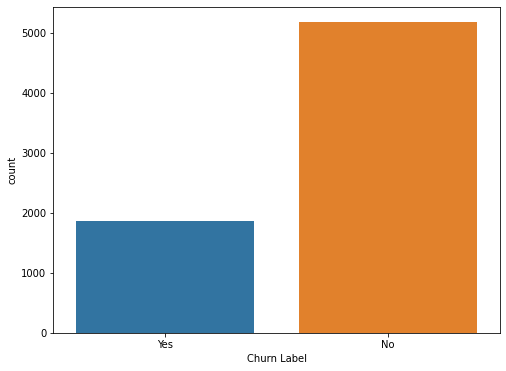

In [ ]:
#Lets start by seeing how much churns

plt.figure(figsize = (8,6))
sns.countplot(df['Churn Label']) #It appears that nearly half customers have churned

In [ ]:
df['Churn Label'].value_counts() #1869 churns

No     5174
Yes    1869
Name: Churn Label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-0.5, 5.5)

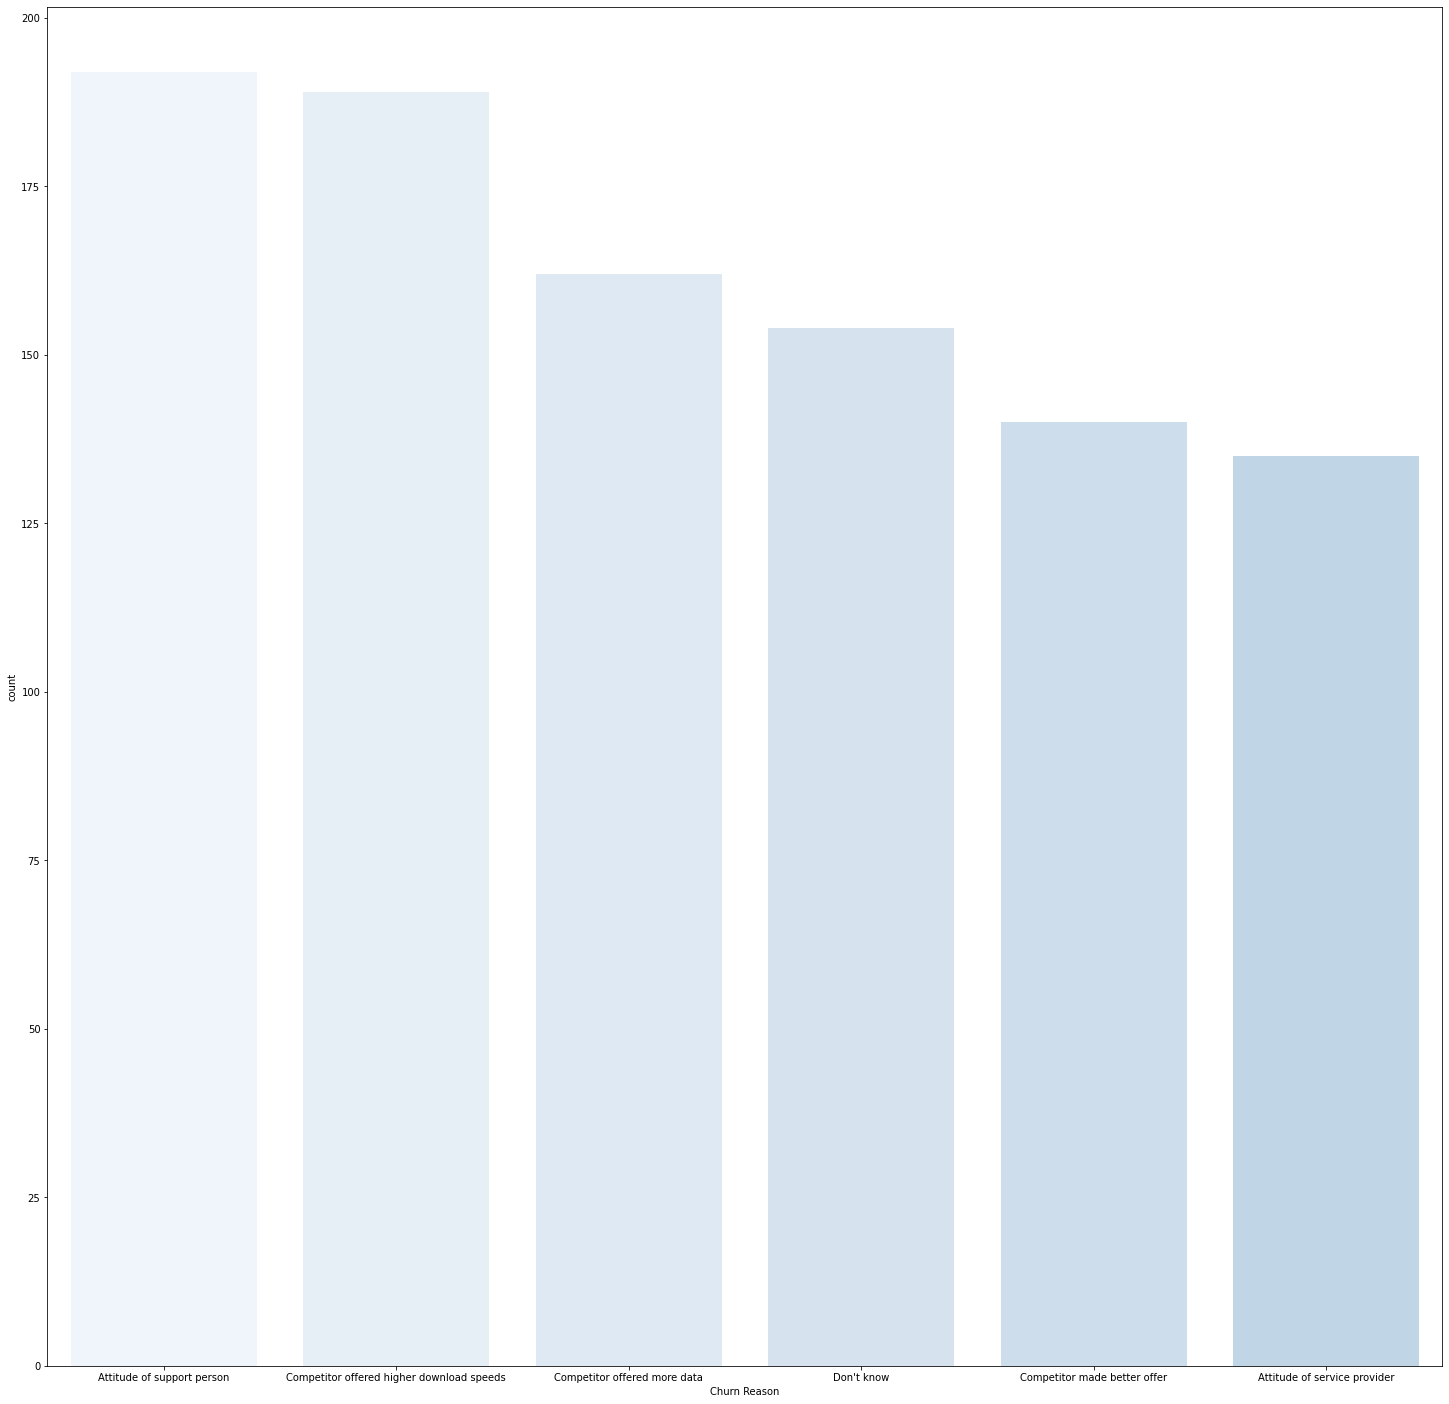

In [ ]:
plt.figure(figsize = (25,25))

order = df['Churn Reason'].value_counts().index

sns.countplot(df['Churn Reason'], palette = 'Blues', order = order) # There are too many reasons, we will shrink it to first 10 reasons

plt.xlim(-0.5,5.5)

In [ ]:
#From this plot we can deduce that most of churns occured due to attitude of support person, That is why every company has to make sure that customer support attitude is good with customers,
#The company should also offer higher dwnload speeds with better offer to avoid losing customers

In [ ]:
#!pip install geopandas

(0.0, 55.0)

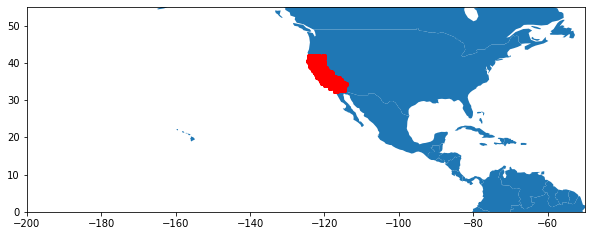

In [ ]:

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

plt.xlim(-200,-50)
plt.ylim(0,55)

#Most of tha data is in US

In [ ]:
df['Partner'].value_counts() #Nearly 50/50

No     3641
Yes    3402
Name: Partner, dtype: int64

In [ ]:
df['Customer Status'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: Customer Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


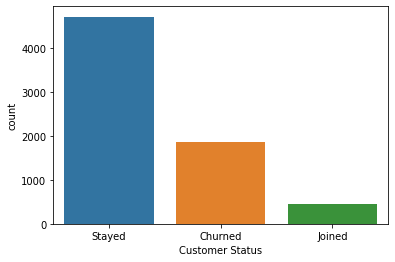

In [ ]:
plt.figure(figsize = (6,4))

sns.countplot(df['Customer Status'], order = df['Customer Status'].value_counts().index )

#This plot shows how many stayed, churned and recently joined

In [ ]:
df['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


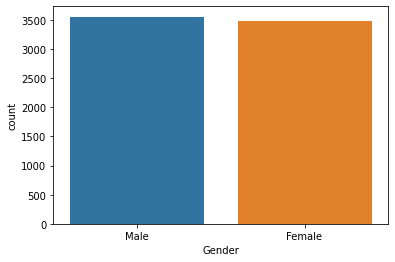

In [ ]:
sns.countplot(df['Gender']) #Balance between male and female
#Lets check which gender churned more

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


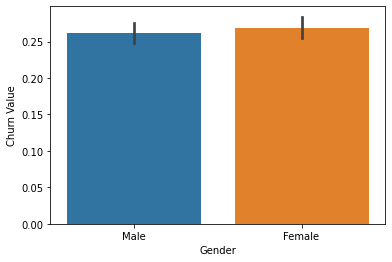

In [ ]:
sns.barplot(df['Gender'], df['Churn Value']) #Females had slightly more churns

In [ ]:
df['Offer'].value_counts() # Most offer were none
#THe most used offer is OFfer E and the least used one is Offer C

None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


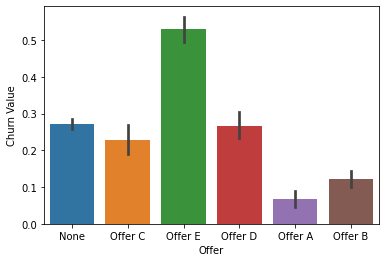

In [ ]:
sns.barplot(df['Offer'], df['Churn Value'])
#Apparently offer E had alot of problems because it has mos of the churns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


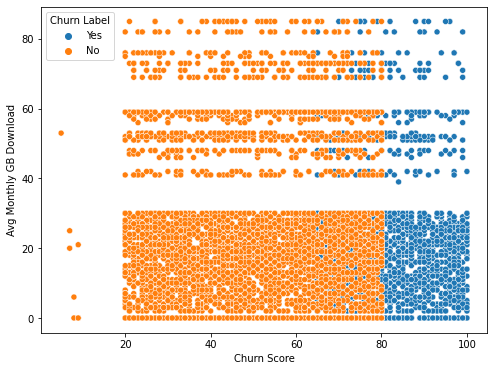

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(df['Churn Score'], df['Avg Monthly GB Download'], hue = df['Churn Label']) #Most churns were in Low GB Download

In [ ]:
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


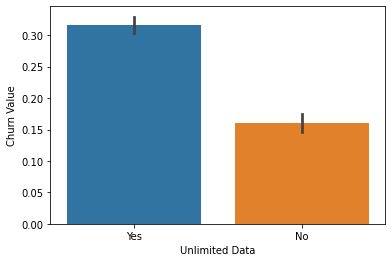

In [ ]:
sns.barplot(df['Unlimited Data'], df['Churn Value'])

#From this graph, most churns were customers with Unlimited Data, Maybe this offer had some technical problems , like it wasn't really unlimited
#Had speed problems, etc..

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


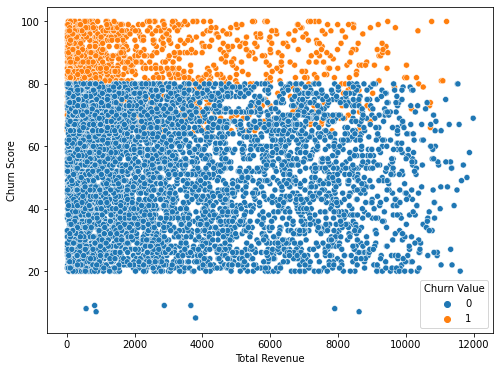

In [ ]:
plt.figure(figsize = (8,6))

sns.scatterplot(df['Total Revenue'], df['Churn Score'], hue = df['Churn Value'])
# We can deduce from this graph, that More churns occured in low revenues, that makes sense,
# because when you hate a product you always give low revenue, and most likely you change the company you deal with

In [ ]:
#Lets make a scatter plot to Compare Monthly charges and Monthly GB

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


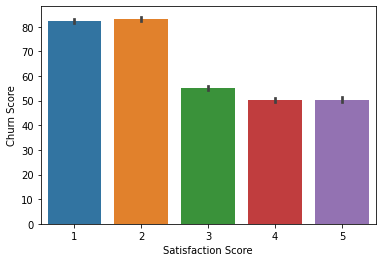

In [ ]:
sns.barplot(df['Satisfaction Score'], df['Churn Score']) #The more churn score the less the satisfaction, Thats an inverse relation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


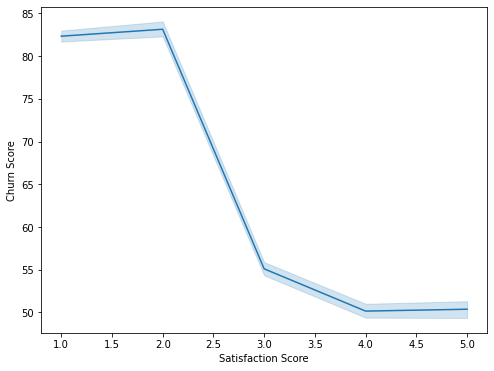

In [ ]:
plt.figure(figsize = (8,6))

sns.lineplot(df['Satisfaction Score'], df['Churn Score'])

#Thats an inverse relation between satisfaction and Churnscore , which makes sense

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique 

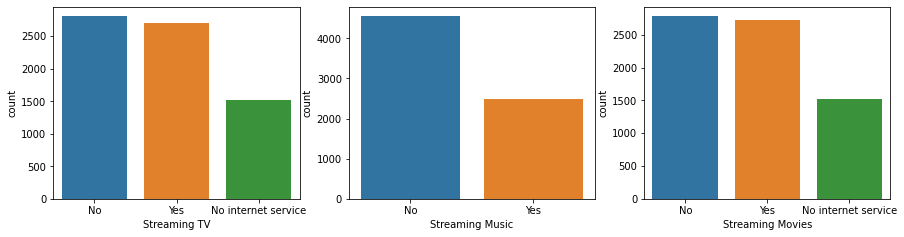

In [ ]:

plt.figure(figsize = (15,12))
plt.subplot(3,3,3)

plt.subplot(3,3,1)
sns.countplot(df['Streaming TV'])

plt.subplot(3,3,2)
sns.countplot(df['Streaming Music'])


plt.subplot(3,3,3)
sns.countplot(df['Streaming Movies'])

#Most streamings were no

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a u

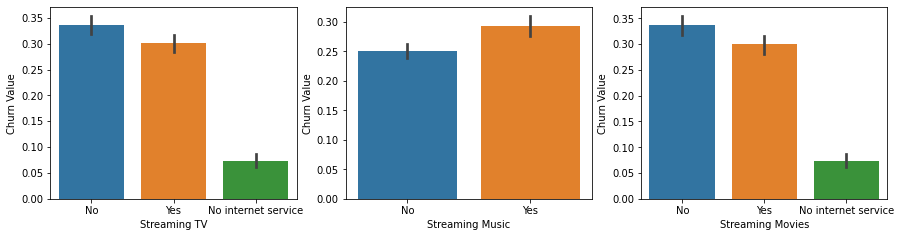

In [ ]:

plt.figure(figsize = (15,12))
plt.subplot(3,3,3)

plt.subplot(3,3,1)
sns.barplot(df['Streaming TV'], df['Churn Value'])

plt.subplot(3,3,2)
sns.barplot(df['Streaming Music'], df['Churn Value'])


plt.subplot(3,3,3)
sns.barplot(df['Streaming Movies'], df['Churn Value'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


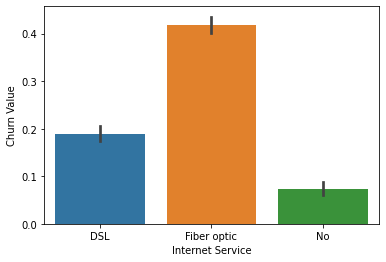

In [ ]:
sns.barplot(df['Internet Service'], df['Churn Value'])
#Aparently fiber optic has alot of problems

In [ ]:
df['Device Protection Plan'].value_counts()
#Most of data had no protection plan

No     4621
Yes    2422
Name: Device Protection Plan, dtype: int64

In [ ]:
df['Churn Category'].value_counts()#We can see from this that most churns were because competitor had better service or better offers, 
#The attitude of Customer Service has a huge impact on churns, 
#The prices may have been high for some customers

Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: Churn Category, dtype: int64

In [ ]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


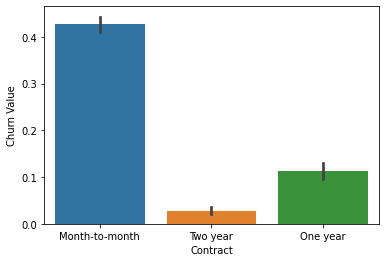

In [ ]:
sns.barplot(df['Contract'], df['Churn Value'])
#Most of churns were on month to month contracts
#Churns can be reduced if customers get better offerce for yearly contracts 

In [ ]:
df['Phone Service'].value_counts() #Most users had Phone service

Yes    6361
No      682
Name: Phone Service, dtype: int64

In [ ]:
df['Dependents'].value_counts()

No     5416
Yes    1627
Name: Dependents, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


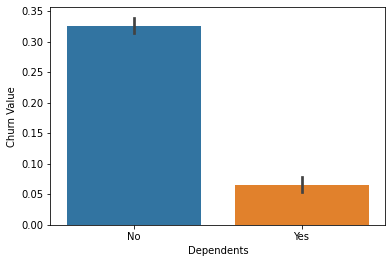

In [ ]:
sns.barplot(df['Dependents'], df['Churn Value'])

# Most churns were done by users who aren't dependant
# That makes sense, because when you don't pay, you are not concerned about changing company
# The copany could reduce churns by focusin on dependant customers like people below 18 years old 

In [ ]:
df['Quarter'] #all values are Q3 so lets dro this column
df = df.drop('Quarter', axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


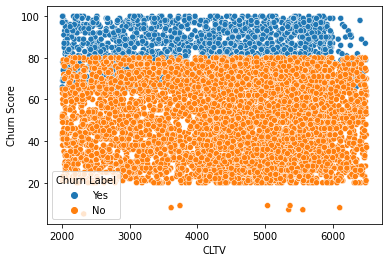

In [ ]:
sns.scatterplot(df['CLTV'], df['Churn Score'], hue = df['Churn Label'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


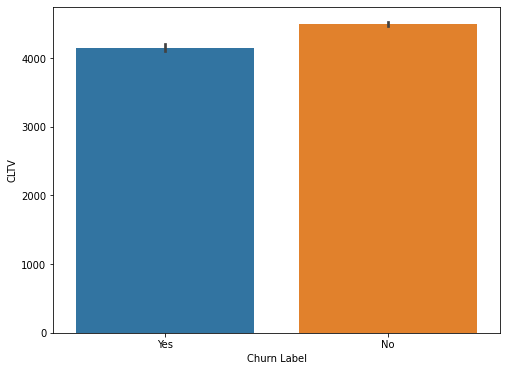

In [ ]:
plt.figure(figsize = (8,6))

sns.barplot(df['Churn Label'], df['CLTV'])

#We can deduce that the more Loan to value the less churns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


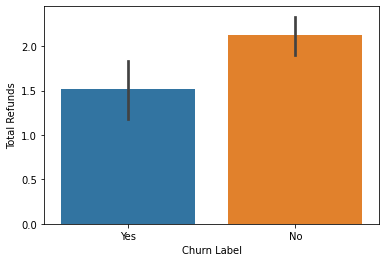

In [ ]:
#Lets see total refunds and churns

sns.barplot(df['Churn Label'], df['Total Refunds']) #The more refunds the less the churns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


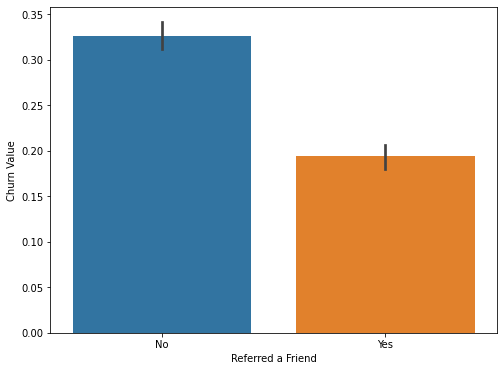

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(df['Referred a Friend'], df['Churn Value'])

#Less churns occur when the company is reffered to a friend,
#To decrease churns the company may reward customers who refer them to a friend
#This will increase their customers and decrease churns in the sametime

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


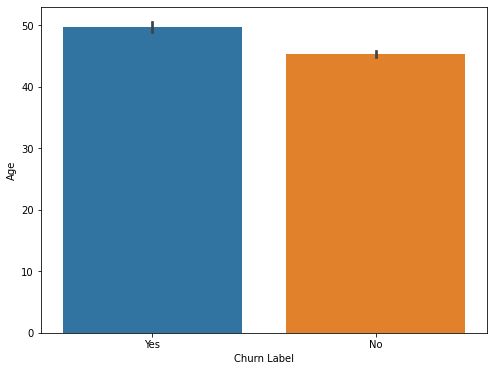

In [ ]:
plt.figure(figsize = (8,6))

sns.barplot(df['Churn Label'], df['Age'])

#The more the age the more churns, but its a very small difference

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


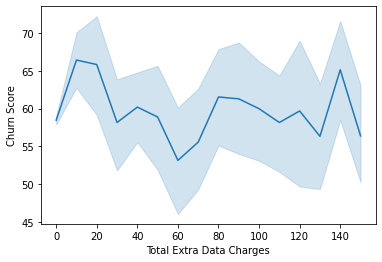

In [ ]:
df['Total Extra Data Charges'].value_counts() #Most of the data had no extra charges

sns.lineplot(df['Total Extra Data Charges'], df['Churn Score']) #there is not much relation between extra charges and churn scores

In [ ]:
#Now that we know that all the data is in the us in one state , lets drop this column
df = df.drop('geometry', axis = 1)

In [ ]:
df['City'].value_counts()
#Lets see which cities has most churns

Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: City, Length: 1129, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-0.5, 5.5)

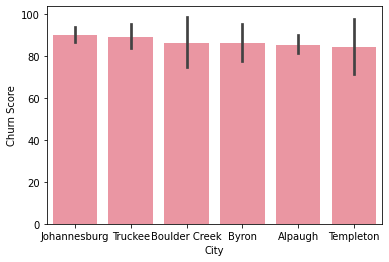

In [ ]:
order = df.groupby(["City"])["Churn Score"].mean().sort_values(ascending=False).index

sns.barplot(df['City'], df['Churn Score'], order = order)

plt.xlim(-0.5,5.5)

#Cities with highest churns

In [ ]:
df['Premium Tech Support'].value_counts() #Most data had no tech support

No     4999
Yes    2044
Name: Premium Tech Support, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


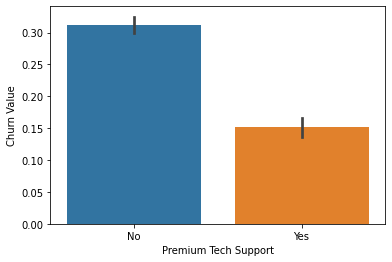

In [ ]:
sns.barplot(df['Premium Tech Support'], df['Churn Value'])
#Most cherns were not tech supported
#Churns can be decreasd by making offers on premium tech supports so more people start using it

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


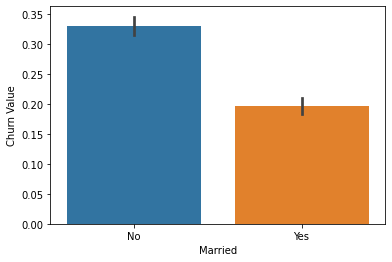

In [ ]:
sns.barplot(df['Married'], df['Churn Value']) 
#Most churns are from single people
#If the company tries getting more married customers, churns can be decreased

In [ ]:
df['Paperless Billing'].value_counts()

Yes    4171
No     2872
Name: Paperless Billing, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


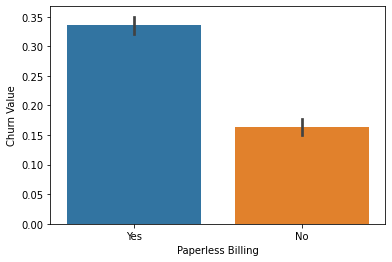

In [ ]:
sns.barplot(df['Paperless Billing'], df['Churn Value'])
#Paperless billing has more churns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


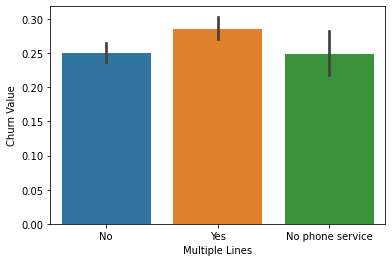

In [ ]:
sns.barplot(df['Multiple Lines'], df['Churn Value'])
#The more lines, the more churns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


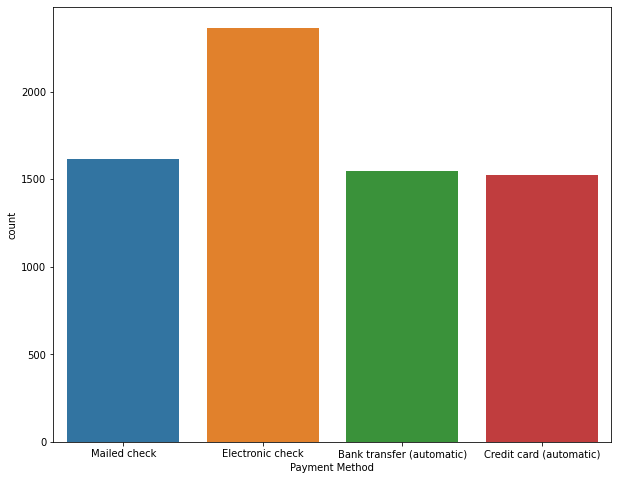

In [ ]:
plt.figure(figsize = (10,8))

sns.countplot(df['Payment Method'])

#Most payements were Electronic Checks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


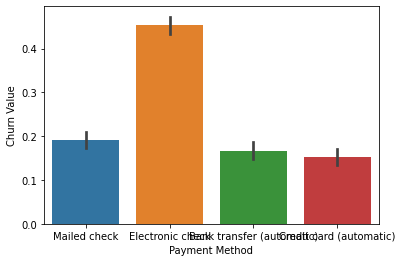

In [ ]:
#Lets check which payement method has more churns

sns.barplot(df['Payment Method'], df['Churn Value'])

#Similar to the previous plot, churns has nothing to do with payement method

In [ ]:
df['Country'].unique() #Only US as we said earlier so lets drop it
df = df.drop('Country', axis = 1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   State                              7043 non-null   object 
 1   City                               7043 non-null   object 
 2   Zip Code                           7043 non-null   int64  
 3   Lat Long                           7043 non-null   object 
 4   Latitude                           7043 non-null   float64
 5   Longitude                          7043 non-null   float64
 6   Gender                             7043 non-null   object 
 7   Senior Citizen                     7043 non-null   object 
 8   Partner                            7043 non-null   object 
 9   Dependents                         7043 non-null   object 
 10  Tenure Months                      7043 non-null   int64  
 11  Phone Service                      7043 non-null   objec

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


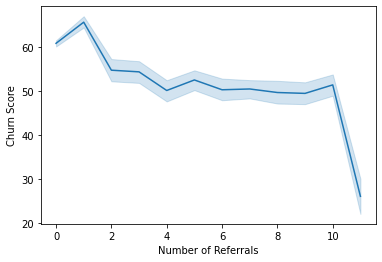

In [ ]:
#Lets plot relation between number f referrals and churn score

sns.lineplot(df['Number of Referrals'], df['Churn Score'])

#As you can see, this relation is inverse because with more refferals the more satisfication
#And therefor less Churns

In [ ]:
df['Senior Citizen'].value_counts() 

No     5901
Yes    1142
Name: Senior Citizen, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


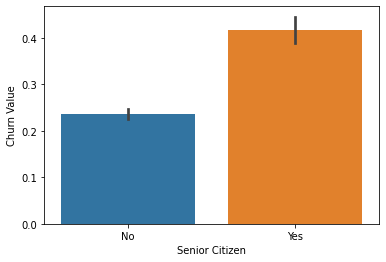

In [ ]:
sns.barplot(df['Senior Citizen'], df['Churn Value'])
#Senior citizens tend to have more churns
#The company may try to avoid them to decrease number of churns

In [ ]:
df['Device Protection Plan'].value_counts()

No     4621
Yes    2422
Name: Device Protection Plan, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


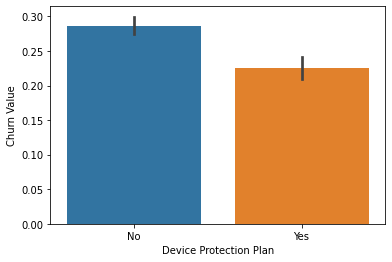

In [ ]:
sns.barplot(df['Device Protection Plan'], df['Churn Value']) #Device protection plan has nothing to do with churns

#EDA CONCISION
we can see from all of these plots the following

* Alot of churns were because competitors provided better offers and speeds
* Most churns because of bad attitude of customer service
* The company should also offer higher download speeds with better offer to avoid losing customers
*   The company should stat making customer service more polite with customers
*   OFFer E had most churns
*   most churns were customers with Unlimited Data, Maybe this offer had some technical problems , like it wasn't really unlimited Had speed problems, etc..
*   There was something with download cache as Most churns were because of low download 
*   The company should encourage and reward those who refer a friend because the more refered the less churns occurs , this can be done by giving those who refer a friend rewards.
*  The company should concentrate on getting more single people and more dependant people because they tend to stay in the company , but married people and independent have high churn values
* Senior citizins had more churns so the company may try to avoid them or see what makes them unhappy with the service by providing more reviews
*  The company should see the reason of high churns in the cities mentioned above, maybe the service in this part not good enough, slow speed, etc...
*  The company should focus more on providing better offers for yearly contracts because the churns decrease massivaly when its a yearly contract
Fiber optic service has alot of churns, the company must have problems providing service for fiberoptics

Now that we Have explored our data, understood what makes high churns, now we can filter out the features that didn't seem to affect churns value, and after feature selection start making our model. 








#Feature selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   State                              7043 non-null   object 
 1   City                               7043 non-null   object 
 2   Zip Code                           7043 non-null   int64  
 3   Lat Long                           7043 non-null   object 
 4   Latitude                           7043 non-null   float64
 5   Longitude                          7043 non-null   float64
 6   Gender                             7043 non-null   object 
 7   Senior Citizen                     7043 non-null   object 
 8   Partner                            7043 non-null   object 
 9   Dependents                         7043 non-null   object 
 10  Tenure Months                      7043 non-null   int64  
 11  Phone Service                      7043 non-null   objec

In [ ]:
#Lets drop first the churn score, churn Label, customer status, churn category,  churn reason because the model would overfit on them
df = df.drop(['Churn Score','Churn Label', 'Customer Status', 'Churn Category', 'Churn Reason'], axis = 1)

In [ ]:
df = df.drop(['Latitude', 'Longitude', 'Zip Code', 'Under 30' ], axis = 1)

In [ ]:
df = df.drop('State', axis = 1)

In [ ]:
#Lets draw a correlation heatmap to see what has high correlation with Churn 

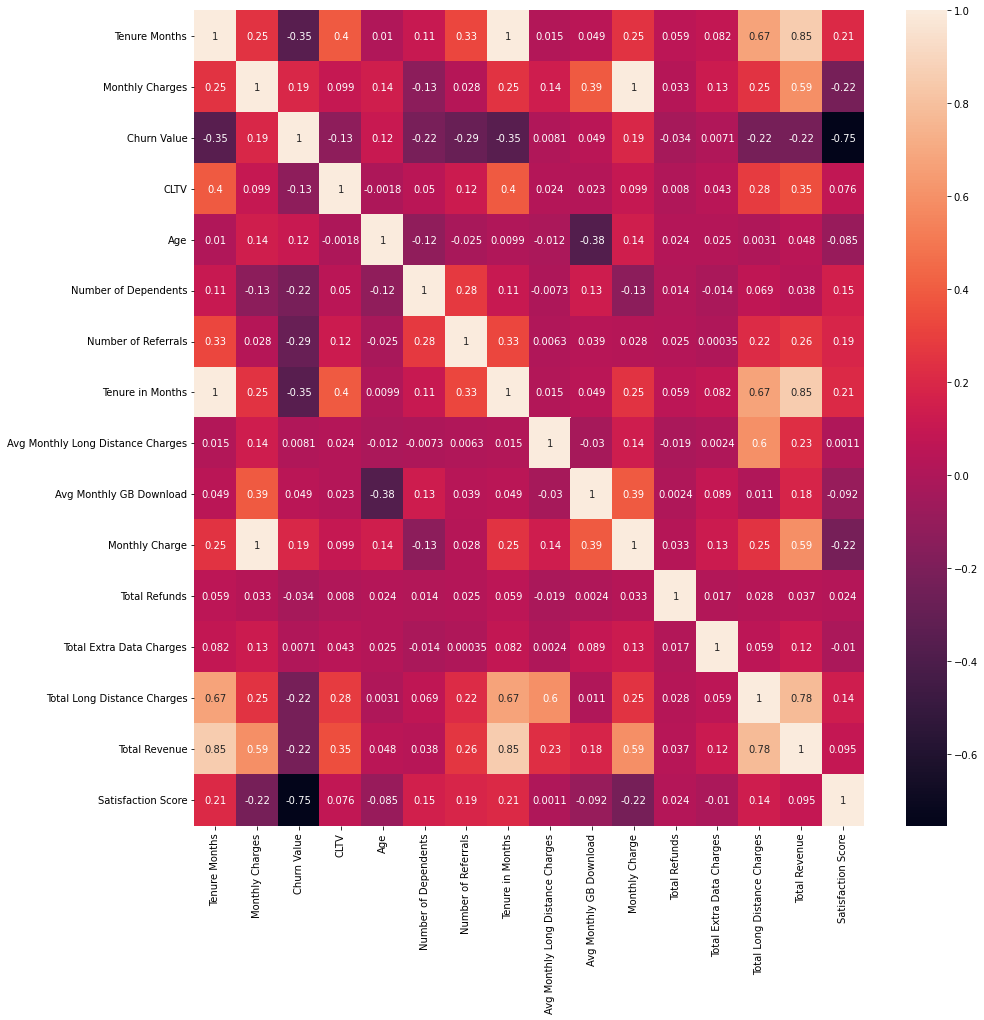

In [ ]:
plt.figure(figsize = (15,15))

corr = df.corr()

sns.heatmap(df.corr(), annot = True)


In [ ]:
df = df.drop('Lat Long', axis = 1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   City                               7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Senior Citizen                     7043 non-null   object 
 3   Partner                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Tenure Months                      7043 non-null   int64  
 6   Phone Service                      7043 non-null   object 
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Online Security                    7043 non-null   object 
 10  Online Backup                      7043 non-null   object 
 11  Device Protection                  7043 non-null   objec

In [ ]:
df.head()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Yes,53.85,0.0,0,20.94,129.09,1
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,Yes,70.70,0.0,0,18.24,169.89,2
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,99.65,0.0,0,97.20,917.70,3
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,104.80,0.0,0,136.92,3182.97,3
4,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,103.70,0.0,0,2172.17,7208.47,1


#Now we dropped all the columns that could affect our model negatively, we can now start using our models but first we have to Use label encoder to Turn all strings to numbers

In [ ]:
df.head()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Yes,53.85,0.0,0,20.94,129.09,1
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,Yes,70.70,0.0,0,18.24,169.89,2
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,99.65,0.0,0,97.20,917.70,3
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,104.80,0.0,0,136.92,3182.97,3
4,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,103.70,0.0,0,2172.17,7208.47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   City                               7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Senior Citizen                     7043 non-null   object 
 3   Partner                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Tenure Months                      7043 non-null   int64  
 6   Phone Service                      7043 non-null   object 
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Online Security                    7043 non-null   object 
 10  Online Backup                      7043 non-null   object 
 11  Device Protection                  7043 non-null   objec

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


data = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand') #Transform all strings to numbers
data.head()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score
0,562,1,0,0,0,12,1,0,0,2,...,0,0,0,1,740,0,0,2082,668,0
1,562,0,0,0,1,12,1,0,1,0,...,0,0,0,1,1033,0,0,1754,1217,1
2,562,0,0,0,1,71,1,2,1,0,...,1,0,1,1,1578,0,0,6031,6650,2
3,562,0,0,1,1,21,1,2,1,0,...,1,1,1,1,90,0,0,863,2902,2
4,562,1,0,0,1,44,1,2,1,0,...,1,0,1,1,68,0,0,2341,5630,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   City                               7043 non-null   int64
 1   Gender                             7043 non-null   int64
 2   Senior Citizen                     7043 non-null   int64
 3   Partner                            7043 non-null   int64
 4   Dependents                         7043 non-null   int64
 5   Tenure Months                      7043 non-null   int64
 6   Phone Service                      7043 non-null   int64
 7   Multiple Lines                     7043 non-null   int64
 8   Internet Service                   7043 non-null   int64
 9   Online Security                    7043 non-null   int64
 10  Online Backup                      7043 non-null   int64
 11  Device Protection                  7043 non-null   int64
 12  Tech Support        

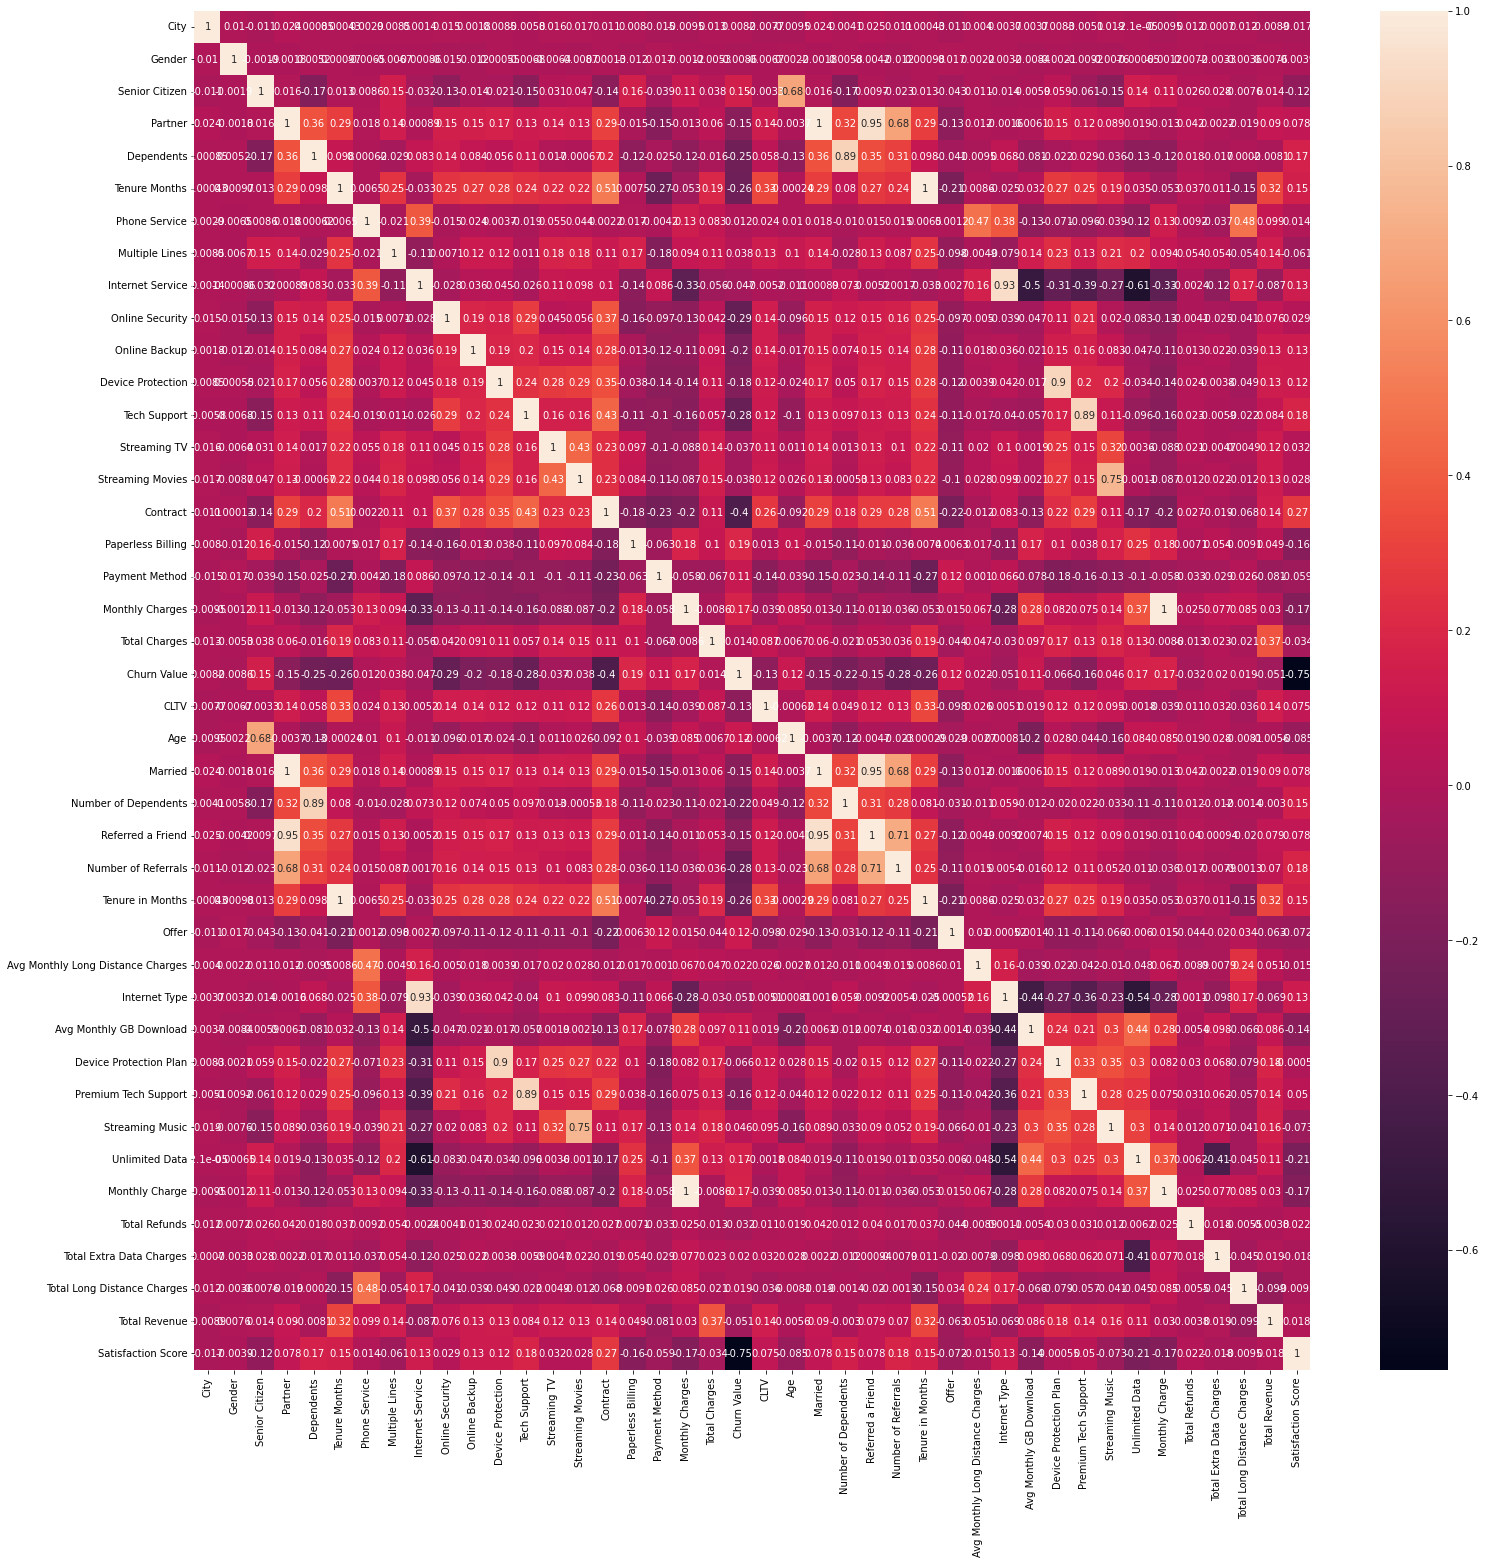

In [ ]:
plt.figure(figsize = (25,25))


sns.heatmap(data.corr(), annot = True)


#Splitting Data

In [ ]:
x = data.drop('Churn Value', axis = 1)
y = data['Churn Value']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(x_train, y_train)

y_pred_log = log_model.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

recall = recall_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
accuracy = accuracy_score(y_test, y_pred_log)

print('Recall Score: ',round(recall,4)*100)
print('Precision Score: ',round(precision,4)*100)
print('F1 Score: ',round(f1,4)*100)
print('Accuracy Score: ',round(accuracy,4)*100)

Recall Score:  33.07
Precision Score:  60.58
F1 Score:  42.78
Accuracy Score:  76.08


Text(0, 0.5, 'True positive rate')

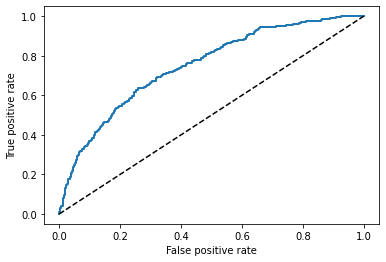

In [ ]:
from sklearn.metrics import roc_curve

y_pred_proba_log = log_model.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba_log)

plt.plot(fprs, tprs, linewidth = 2)

plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')


In [ ]:
from sklearn.metrics import roc_auc_score

log_auc = roc_auc_score(y_test, y_pred_proba_log)

print(log_auc)

0.749354044752188


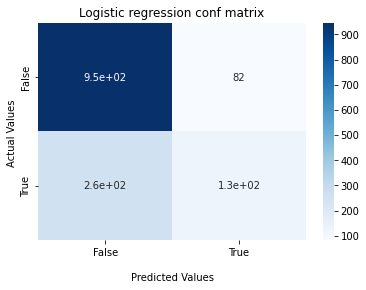

In [ ]:
from sklearn.metrics import confusion_matrix

mat_log = confusion_matrix(y_test, y_pred_log)

ax = sns.heatmap(mat_log, annot=True, cmap='Blues')

ax.set_title('Logistic regression conf matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matarix.
plt.show()    



#Logistic regression wasn't the best choice as the evaluation scores are so low

#KNN , SVM . For this kind of data , KNN and SVM Won't be best choice because its a relatively large dataset with alot of features, we can try it out

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = { 'n_neighbors' : [5,8,3,10,15]
           }

knn_model = KNeighborsClassifier()

grid = GridSearchCV(estimator = knn_model, param_grid = params, cv = 5)

grid.fit(x_train, y_train)

print(grid.best_params_)



{'n_neighbors': 10}


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 10)

knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

recall = recall_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
accuracy = accuracy_score(y_test, y_pred_knn)

print('Recall Score: ',round(recall,4)*100)
print('Precision Score: ',round(precision,4)*100)
print('F1 Score: ',round(f1,4)*100)
print('Accuracy Score: ',round(accuracy,4)*100)

Recall Score:  19.689999999999998
Precision Score:  52.080000000000005
F1 Score:  28.57
Accuracy Score:  73.39


Text(0, 0.5, 'True positive rate')

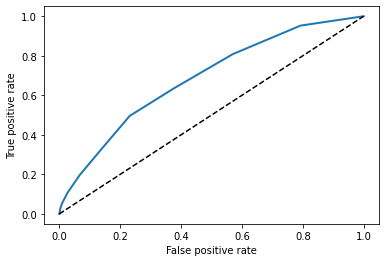

In [ ]:
from sklearn.metrics import roc_curve

y_pred_proba_knn = knn_model.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba_knn)

plt.plot(fprs, tprs, linewidth = 2)

plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')


In [ ]:
from sklearn.metrics import roc_auc_score

knn_auc = roc_auc_score(y_test, y_pred_proba_knn)

print(knn_auc)

0.6850240509819541


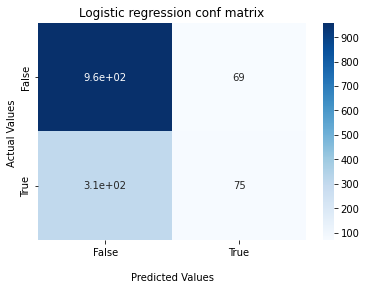

In [ ]:
from sklearn.metrics import confusion_matrix

mat_knn = confusion_matrix(y_test, y_pred_knn)

ax = sns.heatmap(mat_knn, annot=True, cmap='Blues')

ax.set_title('Logistic regression conf matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matarix.
plt.show()    



#SVM

In [ ]:
# from sklearn.svm import SVC

# params = { 'kernel' : ['linear','poly','rbf']}

# svm_model = SVC()

# grid = GridSearchCV(estimator = svm_model, param_grid = params, cv = 5)

# grid.fit(x_train, y_train)

# print(grid.best_params_)

#This took ages to execute

#{'kernel': 'linear'}


In [ ]:
# #Now we that we have used gridsearch to get best kernel, lets fit our model

# from sklearn.svm import SVC

# svm_model = SVC(kernel = 'linear', probability = True, random_state = 2)

# svm_model.fit(x_train, y_train)

# y_pred_svm = svm_model.predict(x_test)

In [ ]:
# # from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# # recall = recall_score(y_test, y_pred_svm)
# # precision = precision_score(y_test, y_pred_svm)
# # f1 = f1_score(y_test, y_pred_svm)
# # accuracy = accuracy_score(y_test, y_pred_svm)

# # print('Recall Score: ',round(recall,4)*100)
# # print('Precision Score: ',round(precision,4)*100)
# # print('F1 Score: ',round(f1,4)*100)
# # print('Accuracy Score: ',round(accuracy,4)*100)

# # #Huge leep in scores


# Recall Score:  88.98
# Precision Score:  96.03
# F1 Score:  92.36999999999999
# Accuracy Score:  96.03

Text(0, 0.5, 'True positive rate')

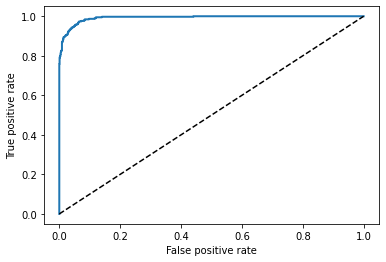

In [ ]:
from sklearn.metrics import roc_curve

y_pred_proba_svm = svm_model.predict_proba(x_test)[:,1]

fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_pred_proba_svm)

plt.plot(fpr_svm, tpr_svm, linewidth = 2)

plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')


In [ ]:
from sklearn.metrics import roc_auc_score

svm_auc = roc_auc_score(y_test, y_pred_proba_svm)

print(svm_auc) #0.99 auc score

0.9924042811769153


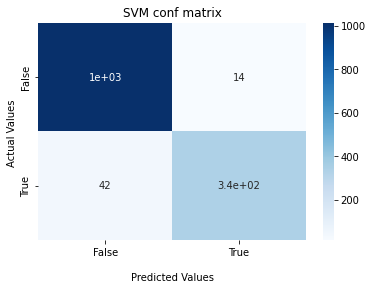

In [ ]:
from sklearn.metrics import confusion_matrix

mat_svm = confusion_matrix(y_test, y_pred_svm)

ax = sns.heatmap(mat_svm, annot=True, cmap='Blues')

ax.set_title('SVM conf matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matarix.
plt.show()    



#The SVM model had huge leep in scores, for this model we used linear kernel by gridsearch which had the best values,

#Overall accuracy was 96.03 %
#UC Score was 99.24 percent, which is the best value until now

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(x_train, y_train)

y_pred_nb = nb_model.predict(x_test)



In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

recall = recall_score(y_test, y_pred_nb)
precision = precision_score(y_test,y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)
accuracy = accuracy_score(y_test, y_pred_nb)

print('Recall Score: ',round(recall,4)*100)
print('Precision Score: ',round(precision,4)*100)
print('F1 Score: ',round(f1,4)*100)
print('Accuracy Score: ',round(accuracy,4)*100)

#The naive bayes scores aren't bad, they are relatively close to svm but not accurate enough

Recall Score:  84.78
Precision Score:  66.46
F1 Score:  74.51
Accuracy Score:  84.32


Text(0, 0.5, 'True positive rate')

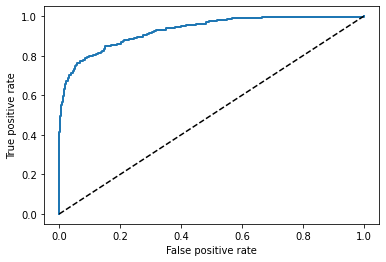

In [ ]:
from sklearn.metrics import roc_curve

y_pred_proba_nb = nb_model.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba_nb)

plt.plot(fprs, tprs, linewidth = 2)

plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')


In [ ]:
from sklearn.metrics import roc_auc_score

nb_auc = roc_auc_score(y_test, y_pred_proba_nb)

print(nb_auc)

0.9292053473860514


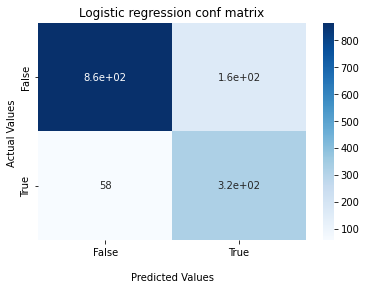

In [ ]:
from sklearn.metrics import confusion_matrix

mat_nb = confusion_matrix(y_test, y_pred_nb)

ax = sns.heatmap(mat_nb, annot=True, cmap='Blues')

ax.set_title('Logistic regression conf matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matarix.
plt.show()    



#Naive Bayes Overall score was good, with total accuracy of 84.32%

#The AUC Score is 92.9 percent , This is the second best model we have until now after the SVM model

#Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params = { 'max_depth' : [None, 3, 5,7,10],
           'min_samples_split' : [2,4,6],
          }

tree_model = DecisionTreeClassifier(random_state = 2)

grid = GridSearchCV(tree_model, param_grid = params, cv = 5)

grid.fit(x_train, y_train)

print(grid.best_params_)

{'max_depth': 5, 'min_samples_split': 2}


In [ ]:
tree_model = DecisionTreeClassifier(random_state = 2, max_depth = 5, min_samples_split = 2)

tree_model.fit(x_train, y_train)

y_pred_tree = tree_model.predict(x_test)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

recall = recall_score(y_test, y_pred_tree)
precision = precision_score(y_test,y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
accuracy = accuracy_score(y_test, y_pred_tree)

print('Recall Score: ',round(recall,4)*100)
print('Precision Score: ',round(precision,4)*100)
print('F1 Score: ',round(f1,4)*100)
print('Accuracy Score: ',round(accuracy,4)*100)

#The decision Tree scores are Very close to SVM 

Recall Score:  80.84
Precision Score:  97.47
F1 Score:  88.38000000000001
Accuracy Score:  94.25


Text(0, 0.5, 'True positive rate')

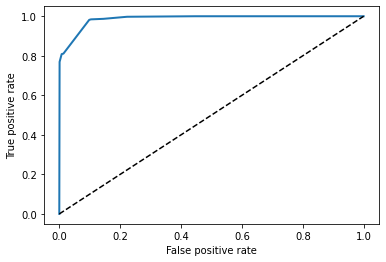

In [ ]:
from sklearn.metrics import roc_curve

y_pred_proba_tree = tree_model.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba_tree)

plt.plot(fprs, tprs, linewidth = 2)

plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')


In [ ]:
from sklearn.metrics import roc_auc_score

tree_auc = roc_auc_score(y_test, y_pred_proba_tree)

print(tree_auc)

0.9864808970863078


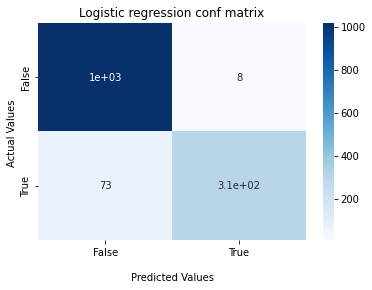

In [ ]:
from sklearn.metrics import confusion_matrix

mat_tree = confusion_matrix(y_test, y_pred_tree)

ax = sns.heatmap(mat_tree, annot=True, cmap='Blues')

ax.set_title('Logistic regression conf matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matarix.
plt.show()    



#The decision Tree model had very good scores, very close to SVM model

#Now Decision Tree model is in 2nd place with overall AUC 0.986

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

params = { 'n_estimators' : [100,150,200],
           'max_depth' : [5,10,None],
           'min_samples_split' : [2,4,6,8]}

grid = GridSearchCV(rf_model, param_grid = params, cv = 5)

grid.fit(x_train, y_train)

print(grid.best_params_)

{'max_depth': None, 'min_samples_split': 6, 'n_estimators': 200}


In [ ]:
rf_model = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_split = 6, random_state = 2)

rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

recall = recall_score(y_test, y_pred_rf)
precision = precision_score(y_test,y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)

print('Recall Score: ',round(recall,4)*100)
print('Precision Score: ',round(precision,4)*100)
print('F1 Score: ',round(f1,4)*100)
print('Accuracy Score: ',round(accuracy,4)*100)

#The decision Tree scores are Very close to SVM 

Recall Score:  83.46000000000001
Precision Score:  98.15
F1 Score:  90.21000000000001
Accuracy Score:  95.1


Text(0, 0.5, 'True positive rate')

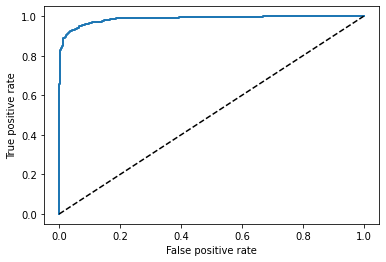

In [ ]:
from sklearn.metrics import roc_curve

y_pred_proba_rf = rf_model.predict_proba(x_test)[:,1]

fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_proba_rf)

plt.plot(fpr_rf, tpr_rf, linewidth = 2)

plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')


In [ ]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

print(rf_auc)

0.9868664276887568


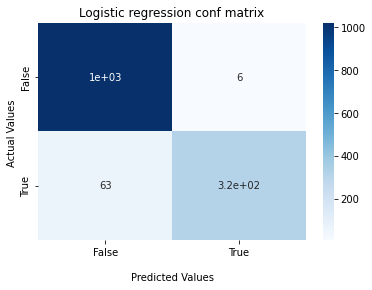

In [ ]:
from sklearn.metrics import confusion_matrix

mat_rf = confusion_matrix(y_test, y_pred_rf)

ax = sns.heatmap(mat_rf, annot=True, cmap='Blues')

ax.set_title('Logistic regression conf matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matarix.
plt.show()    



#Random Forest model Had slightly better scores than decision tree, as complexity increases the model gets better

#AUC Score is the same as decision tree but the acccuracy has slightly gotten better

#XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

params = {'max_depth' : [None, 3, 5,6,8],
          'n_estimators' : [100,150,200,250]
          }

grid = GridSearchCV(xgb_model, param_grid = params, cv = 5)

grid.fit(x_train , y_train)

print(grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line

{'max_depth': 5, 'n_estimators': 100}


In [ ]:


xgb_model = XGBClassifier(max_depth = 5, n_estimators = 100)

xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

recall = recall_score(y_test, y_pred_xgb)
precision = precision_score(y_test,y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb)

print('Recall Score: ',round(recall,4)*100)
print('Precision Score: ',round(precision,4)*100)
print('F1 Score: ',round(f1,4)*100)
print('Accuracy Score: ',round(accuracy,4)*100)

#The decision Tree scores are Very close to SVM 

Recall Score:  87.14
Precision Score:  95.39999999999999
F1 Score:  91.08000000000001
Accuracy Score:  95.39


Text(0, 0.5, 'True positive rate')

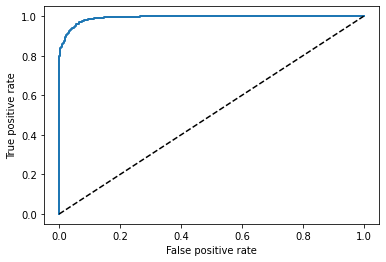

In [ ]:
from sklearn.metrics import roc_curve

y_pred_proba_xgb = xgb_model.predict_proba(x_test)[:,1]

fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_pred_proba_xgb)

plt.plot(fpr_xgb, tpr_xgb, linewidth = 2)

plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')


In [ ]:
from sklearn.metrics import roc_auc_score

xgb_auc = roc_auc_score(y_test, y_pred_proba_xgb)

print(xgb_auc)

0.9925370466823944


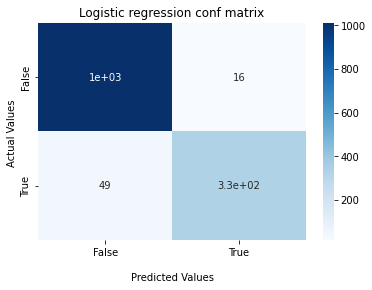

In [ ]:
from sklearn.metrics import confusion_matrix

mat_xgb = confusion_matrix(y_test, y_pred_xgb)

ax = sns.heatmap(mat_xgb, annot=True, cmap='Blues')

ax.set_title('Xgboost conf matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matarix.
plt.show()    



#The XGB model Has best scores after SVM, with total accuracy of 95.39
#AUC score is 99.235

#Now we will try bagging our best models which are SVM, XGBoost and Random forests and see if it makes much difference

In [ ]:
from sklearn.ensemble import VotingClassifier

model_1 = SVC(kernel = 'linear', probability = True, random_state = 2)
model_2 = RandomForestClassifier(n_estimators = 200, max_depth = None, min_samples_split = 6, random_state = 2)
model_3 = XGBClassifier(max_depth = 5, n_estimators = 100)

estim = [('SVM',model_1),('RF', model_2) , ('XGB', model_3)]

bag = VotingClassifier(estim, weights = [5,3,4])

bag.fit(x_train, y_train)

y_pred_bag = bag.predict(x_test)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

recall = recall_score(y_test, y_pred_bag)
precision = precision_score(y_test,y_pred_bag)
f1 = f1_score(y_test, y_pred_bag)
accuracy = accuracy_score(y_test, y_pred_bag)

print('Recall Score: ',round(recall,4)*100)
print('Precision Score: ',round(precision,4)*100)
print('F1 Score: ',round(f1,4)*100)
print('Accuracy Score: ',round(accuracy,4)*100)



Recall Score:  86.61
Precision Score:  97.35000000000001
F1 Score:  91.67
Accuracy Score:  95.74000000000001


#We can conclude that SVM was the best model with highest accuracy,
#But one downside is that svm model takes too long to execute(1 hour +)

#The second place is XGB 

#The third place is Random forests

#And here is roc_curve of the three of them

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

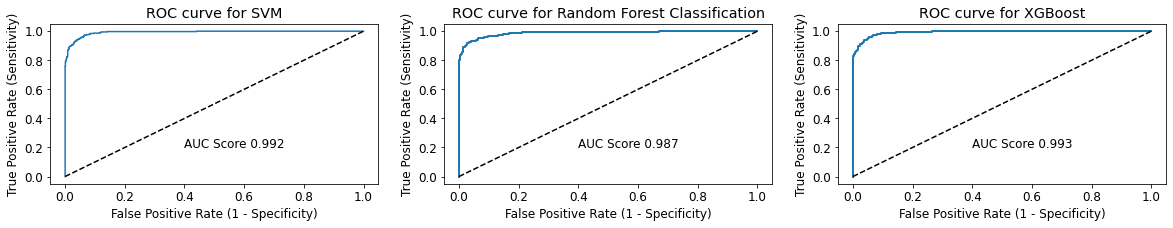

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(3,3,3)

plt.subplot(3,3,1).plot(fpr_svm, tpr_svm)

plt.plot([0,1],[0,1], 'k--')

plt.title('ROC curve for SVM')

plt.text(0.4, 0.2, f'AUC Score {svm_auc :0.3}', fontsize = 12)

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.subplot(3,3,2).plot(fpr_rf, tpr_rf, linewidth = 2)
plt.plot( [0,1], [0,1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Random Forest Classification')

plt.text(0.4, 0.2, f'AUC Score {rf_auc :0.3}', fontsize = 12)

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')


plt.subplot(3,3,3).plot(fpr_xgb, tpr_xgb, linewidth = 2)
plt.plot( [0,1], [0,1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve for XGBoost')

plt.text(0.4, 0.2, f'AUC Score {xgb_auc :0.3}', fontsize = 12)

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')